In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

from datasets import load_metric, load_from_disk, Dataset, DatasetDict

## Wikipedia Dataset

* `domain`이 `None`으로 비워져 있음

* 대용량의 데이터를 효과적으로 classification하여 retrieve할 수 있도록 하는 구조 필요

In [2]:
wiki = pd.read_json("../data/wikipedia_documents.json").T

In [3]:
wiki.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [4]:
wiki.describe()

,text,corpus_source,url,domain,title,author,html,document_id
count,60613,60613,4554,0,60613,0,0,60613
unique,56737,1,1,0,31755,0,0,60613
top,세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...,위키피디아,TODO,NaN,장면,NaN,NaN,60612
freq,40,60613,4554,NaN,146,NaN,NaN,1


### Title count

* 총 `60613`개 데이터

* `31755`개의 `title` unique 값들 중에서 `20018`개가 1개만 존재 (63.0%)

* 2개 이상 중복해서 존재하는 레이블의 수가 상당 (37.0%)

* `장면`이 146개로 가장 많았다.

    * 연속된 글이 별도의 id로 나눠진 것으로 추츨된다.

    * `장면`의 상위 5개 글을 출력해봤을 때 서로 다른 글이 출력된다.

    * 과연 어떠한 방식으로 글을 추출해야 하는가에 대한 고민 필요... 동일한 `title`을 합칠 필요성?

In [5]:
title_count = wiki['title'].value_counts()
title_count

장면                       146
윤치호                      144
여운형                       96
데카메론의 줄거리                 68
루트비히 판 베토벤                66
                        ... 
빨갱이                        1
아르튀르 랭보                    1
아르투르 타이마조프                 1
아나 피델리아 키로트                1
백자 청화운룡문 병 (보물 제785호)      1
Name: title, Length: 31755, dtype: int64

In [6]:
print(np.sum(title_count == 1))
print(np.sum(title_count == 1)/len(title_count))

20018
0.6303889151314753


(array([8.738e+03, 2.298e+03, 5.290e+02, 1.310e+02, 3.400e+01, 5.000e+00]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 6 artists>)

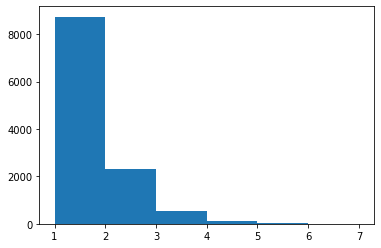

In [7]:
title_count = wiki['title'].value_counts()
plt.hist(np.log2(title_count[title_count > 1]), bins=np.arange(1, 8))

In [8]:
query_title = "장면"

subset = wiki.loc[wiki['title'] == query_title, ]
for idx, row in subset.iterrows():
    print(row['text'])
    if idx > 5:
        break

그는 지난날 일제 강점기의 교육자·종교가·번역가·출판인·문인·저술가였으며 훗날 대한민국의 종교가·외교관·교육자·정치인이었다. 1956년 8월 15일부터 1960년 4월 25일까지  대한민국의 제4대 부통령이었다. 1950년 11월 23일부터 1952년 4월 23일까지 제2대 대한민국 국무총리를, 1960년 8월 19일부터 1961년 5월 17일까지 제7대 국무총리를 역임했다.

초명은 장지태(張志兑), 아호(雅號)는 운석(雲石), 세례명은 요한(Johan), 영문명은 John Myeon Jang·존 면(John Myeon), 일본식 이름은 다마오카 쓰토무(玉岡 勉).

서울 종로에서 태어났다. 일제 강점기에는 천주교 선교 사목 활동과 언론 활동, 용산신학교, 동성상업고등학교, 계성국민학교, 혜화유치원 등에서 교편을 잡았고, 광복 이후 정계에 투신하여 1946년 민주의원 의원, 1947년 남조선과도입법위원회 의원, 1948년 대한민국의 제헌 국회의원  에 당선되었으며, 1948년 12월 7일부터 12월 12일까지 프랑스 파리에서 열리는 제3차 UN 총회에 한국대표단 수석대표로 파견되어 국제사회에 대한민국 정부의 승인을 얻어냈다.

1948년 제3차 UN 총회 한국 대표단 수석대표와 1951년 10월 제6차 UN 총회 파견 수석대표로 다녀왔으며, 대통령 바티칸특사를 거쳐 제1대 주미 한국대사 등을 지내고 1950년 한국 전쟁 당시 미국군과 UN군의 한국전 참전을 호소하여 성사시켰다. 1950년 8월과 9월 UN 안보리에서 ‘한국 전쟁은 내전이며 미국과 남한의 북침’이라는 소련 측의 주장을 논파하기도 하였다.

1946년 과도입법의원 의원 재직 중에는 국대안(국립대학교 설치안)을 발의하여 성사시켰고, 공창제 폐지를 주창하여 가결시켰다. 1948년 UN 총회에 대한민국의 승인을 요청하는 한국 대표단의 수석대표로 회의에 참석하여 국제사회에 대한민국 정부의 승인을 얻어냈고, 한국 전쟁 때는 UN과 국제사회에 대한민국을 도와줄 것을 호소하여 지원을 이끌어냈다. 호헌동지회의

## Train & Validation Set

* `datasets` 모듈은 huggingface에서 제공하는 데이터셋 모음집

* `pandas` 형태가 아니라 `DatasetDict`이라는 형태의 dictionary로 불러옴

* 코드의 형태대로 불러오면 `datasets.arrow_dataset.Dataset` 클래스로 확인되는데, 이것이 무엇인지는 확인할 필요

In [3]:
datasets = load_from_disk("../data/train_dataset")

In [4]:
datasets

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [5]:
type(datasets['train'])

datasets.arrow_dataset.Dataset

In [31]:
def highlight(txt: str, start_idx: int = 0, end_idx: int = -1, color: str = '#96C4ED') -> str:
    if start_idx == 0 and end_idx == -1:
        return f"<span style='color:{color}'>{txt}</span>"
    elif end_idx == -1:
        return f"{txt[:start_idx]}<span style='color:{color}'>{txt[start_idx:]}</span>"
    else:
        return f"{txt[:start_idx]}<span style='color:{color}'>{txt[start_idx:end_idx+1]}</span>{txt[end_idx+1:]}"

In [36]:
output = ""
N = 5
indices = np.random.choice(len(datasets['train']), size=N, replace=False)

for i in indices:

    item = datasets['train'][int(i)]

    start_idx = int(item['answers']['answer_start'][0])
    end_idx = start_idx + len(item['answers']['text'][0]) - 1

    output += highlight(str(i) + ": ", color = "#13CC33") + highlight(item['question'], color="#B19CD9") + "</br>"
    output += highlight(item['context'], start_idx, end_idx) + "</br>"

display(HTML(output))

In [33]:
context_len = []
answer_text = []
answer_start = []
for item in datasets['train']:
    context_len.append(len(item['context']))
    answer_start.append(item['answers']['answer_start'][0])
    answer_text.append(item['answers']['text'])
context_len = np.array(context_len)
answer_start = np.array(answer_start)
answer_len = np.array([len(text) for text in answer_text])

(array([1356., 1022.,  784.,  425.,  171.,   96.,   51.,   26.,   13.,
           8.]),
 array([   0. ,  197.4,  394.8,  592.2,  789.6,  987. , 1184.4, 1381.8,
        1579.2, 1776.6, 1974. ]),
 <BarContainer object of 10 artists>)

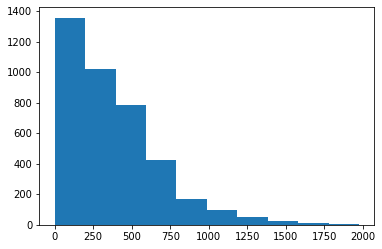

In [34]:
plt.hist(answer_start)

(array([1139.,  854.,  654.,  398.,  284.,  217.,  130.,  111.,   77.,
          88.]),
 array([ 512. ,  666.7,  821.4,  976.1, 1130.8, 1285.5, 1440.2, 1594.9,
        1749.6, 1904.3, 2059. ]),
 <BarContainer object of 10 artists>)

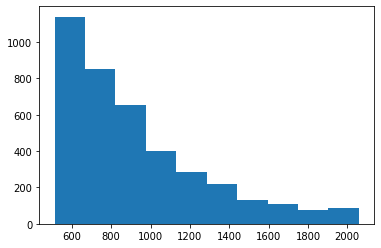

In [35]:
plt.hist(context_len)

In [36]:
answer_relative_position = answer_start/context_len

(array([594., 555., 499., 420., 371., 365., 309., 309., 288., 242.]),
 array([0.        , 0.09915966, 0.19831933, 0.29747899, 0.39663866,
        0.49579832, 0.59495798, 0.69411765, 0.79327731, 0.89243697,
        0.99159664]),
 <BarContainer object of 10 artists>)

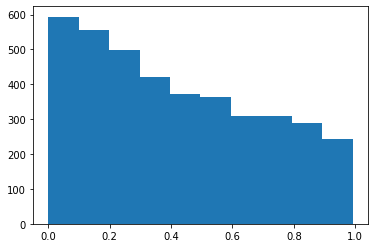

In [40]:
plt.hist(answer_relative_position)

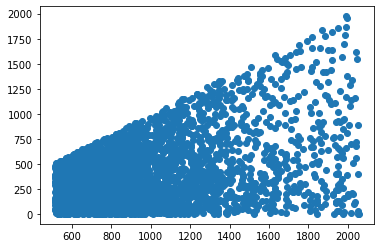

In [41]:
plt.scatter(context_len, answer_start)

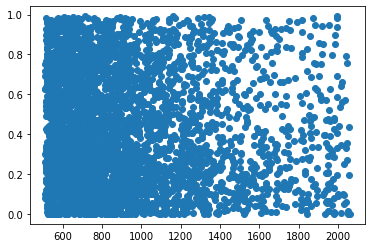

In [42]:
plt.scatter(context_len, answer_relative_position)